In [7]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("export_data/export-pm25_eng-1h.csv", parse_dates=["timestamp"], index_col="timestamp")
df.head()

,Unnamed: 0,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
timestamp,,,,,,,
2023-03-31 22:00:00,0,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784
2023-04-02 18:00:00,1,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966
2023-04-02 19:00:00,2,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829
2023-04-02 20:00:00,3,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227
2023-04-02 21:00:00,4,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888


In [8]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["day_of_week"] = df.index.dayofweek  # 0 = Monday, 6 = Sunday
df["week_of_year"] = df.index.isocalendar().week  # ค่าจะเป็น int64

In [21]:
# Create lag features for the past 7 days
for lag in range(1, 8):  # Lags from 1 to 7 days
    df[f'pm_2_5_lag_{lag}'] = df['pm_2_5'].shift(lag)

df.dropna(subset=["pm_2_5_lag_7"], inplace=True)  # ลบแถวที่ไม่มีค่า PM2.5 Last Week

In [9]:
# Drop NaN values caused by shifting
df.dropna(inplace=True)
df = df.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp", 'pm_10'], axis=1)

In [22]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก
df.head()

,humidity,pm_2_5,temperature,year,month,day,day_of_week,week_of_year,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
timestamp,,,,,,,,,,,,,,,
2023-04-03 00:00:00,66.876119,7.200000,30.042084,2023,4,3,0,14,7.466667,9.366667,9.083333,8.266667,7.800000,7.142857,4.727273
2023-04-03 01:00:00,67.430725,7.783333,29.392181,2023,4,3,0,14,7.200000,7.466667,9.366667,9.083333,8.266667,7.800000,7.142857
2023-04-03 02:00:00,68.017985,16.500000,29.118591,2023,4,3,0,14,7.783333,7.200000,7.466667,9.366667,9.083333,8.266667,7.800000
2023-04-03 03:00:00,68.853455,24.783333,28.612701,2023,4,3,0,14,16.500000,7.783333,7.200000,7.466667,9.366667,9.083333,8.266667
2023-04-03 04:00:00,69.691119,28.543860,28.313422,2023,4,3,0,14,24.783333,16.500000,7.783333,7.200000,7.466667,9.366667,9.083333


In [24]:
df = df.loc['2023-09':]  # ดึงข้อมูลตั้งแต่กันยายน 2023 เป็นต้นไป
df.head()

,humidity,pm_2_5,temperature,year,month,day,day_of_week,week_of_year,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
timestamp,,,,,,,,,,,,,,,
2023-09-01 00:00:00,91.043318,11.183333,26.380818,2023,9,1,4,35,8.416667,12.633333,15.389831,9.866667,20.716667,7.750000,15.816667
2023-09-01 01:00:00,91.092330,20.800000,26.178296,2023,9,1,4,35,11.183333,8.416667,12.633333,15.389831,9.866667,20.716667,7.750000
2023-09-01 02:00:00,90.980568,24.683333,26.299600,2023,9,1,4,35,20.800000,11.183333,8.416667,12.633333,15.389831,9.866667,20.716667
2023-09-01 03:00:00,92.109653,24.881356,26.171867,2023,9,1,4,35,24.683333,20.800000,11.183333,8.416667,12.633333,15.389831,9.866667
2023-09-01 04:00:00,92.897068,28.783333,26.099343,2023,9,1,4,35,24.881356,24.683333,20.800000,11.183333,8.416667,12.633333,15.389831


In [25]:
compare_data = df[-7:]  # Last 7 known values
compare_data
df = df[:-7]
compare_data

,humidity,pm_2_5,temperature,year,month,day,day_of_week,week_of_year,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7
timestamp,,,,,,,,,,,,,,,
2025-02-10 07:00:00,90.706645,37.222222,23.125429,2025,2,10,0,7,29.289474,28.583333,27.516667,24.150000,24.866667,25.566667,26.288136
2025-02-10 08:00:00,86.918687,34.133333,24.275117,2025,2,10,0,7,37.222222,29.289474,28.583333,27.516667,24.150000,24.866667,25.566667
2025-02-10 09:00:00,74.612411,28.666667,27.176861,2025,2,10,0,7,34.133333,37.222222,29.289474,28.583333,27.516667,24.150000,24.866667
2025-02-10 10:00:00,65.961271,26.810345,29.180450,2025,2,10,0,7,28.666667,34.133333,37.222222,29.289474,28.583333,27.516667,24.150000
2025-02-10 11:00:00,60.467890,26.650000,30.644287,2025,2,10,0,7,26.810345,28.666667,34.133333,37.222222,29.289474,28.583333,27.516667
2025-02-10 12:00:00,57.586702,26.033333,31.067121,2025,2,10,0,7,26.650000,26.810345,28.666667,34.133333,37.222222,29.289474,28.583333
2025-02-10 13:00:00,57.341906,25.016667,31.437780,2025,2,10,0,7,26.033333,26.650000,26.810345,28.666667,34.133333,37.222222,29.289474


In [26]:
exp = setup(data=df, target='pm_2_5', fold=10, session_id=123, iterative_imputation_iters=100, remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(11440, 15)"
4,Transformed data shape,"(11039, 15)"
5,Transformed train set shape,"(7606, 15)"
6,Transformed test set shape,"(3433, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [27]:
best_model = compare_models()  # Find the best regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.2335,23.0043,4.7930,0.8482,0.2768,0.2344,0.0860
gbr,Gradient Boosting Regressor,3.2724,23.3779,4.8311,0.8457,0.2784,0.2400,0.2780
ridge,Ridge Regression,3.2665,23.4009,4.8332,0.8456,0.2805,0.2424,0.0320
br,Bayesian Ridge,3.2661,23.3981,4.8329,0.8456,0.2803,0.2423,0.0300
lr,Linear Regression,3.2665,23.4010,4.8332,0.8456,0.2805,0.2424,0.0370
lar,Least Angle Regression,3.2776,23.5191,4.8458,0.8448,0.2823,0.2437,0.0290
en,Elastic Net,3.2927,23.5893,4.8529,0.8443,0.2803,0.2447,0.0320
lasso,Lasso Regression,3.2984,23.7483,4.8694,0.8433,0.2803,0.2448,0.0310
llar,Lasso Least Angle Regression,3.2981,23.7468,4.8692,0.8433,0.2803,0.2447,0.0300
et,Extra Trees Regressor,3.2936,23.8457,4.8795,0.8427,0.2830,0.2432,0.3230


In [28]:
predict_model(best_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.7387,16.4316,4.0536,0.8921,0.2380,0.1974


,humidity,temperature,year,month,day,day_of_week,week_of_year,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7,pm_2_5,prediction_label
timestamp,,,,,,,,,,,,,,,,
2023-09-01 00:00:00,91.043320,26.380817,2023,9,1,4,35,8.416667,12.633333,15.389831,9.866667,20.716667,7.750000,15.816667,11.183333,9.644731
2023-09-01 01:00:00,91.092331,26.178295,2023,9,1,4,35,11.183333,8.416667,12.633333,15.389831,9.866667,20.716667,7.750000,20.799999,14.589292
2023-09-01 02:00:00,90.980568,26.299601,2023,9,1,4,35,20.799999,11.183333,8.416667,12.633333,15.389831,9.866667,20.716667,24.683332,23.437361
2023-09-01 03:00:00,92.109650,26.171867,2023,9,1,4,35,24.683332,20.799999,11.183333,8.416667,12.633333,15.389831,9.866667,24.881355,25.896027
2023-09-01 04:00:00,92.897064,26.099342,2023,9,1,4,35,24.881355,24.683332,20.799999,11.183333,8.416667,12.633333,15.389831,28.783333,26.719915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-09 18:00:00,72.739960,27.599747,2025,2,9,6,6,25.566668,26.288136,27.616667,26.799999,27.250000,22.034483,17.783333,24.866667,25.923565
2025-02-09 19:00:00,76.565781,26.707760,2025,2,9,6,6,24.866667,25.566668,26.288136,27.616667,26.799999,27.250000,22.034483,24.150000,24.729852
2025-02-09 20:00:00,78.372849,26.387886,2025,2,9,6,6,24.150000,24.866667,25.566668,26.288136,27.616667,26.799999,27.250000,27.516666,24.136633


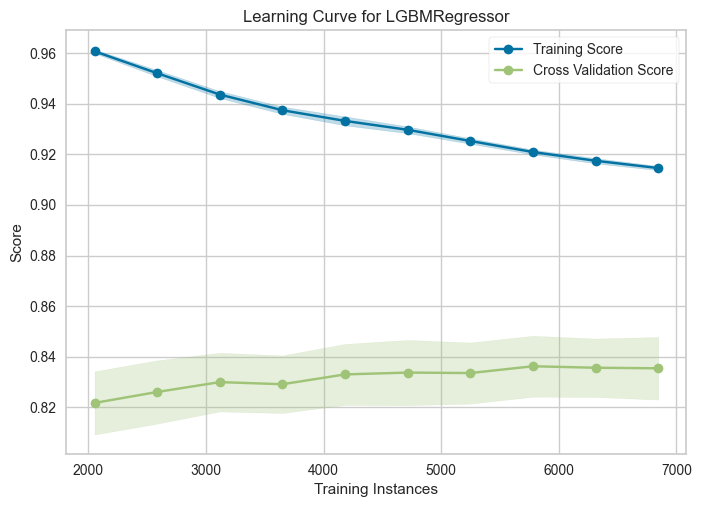

In [29]:
plot_model(best_model, plot='learning')

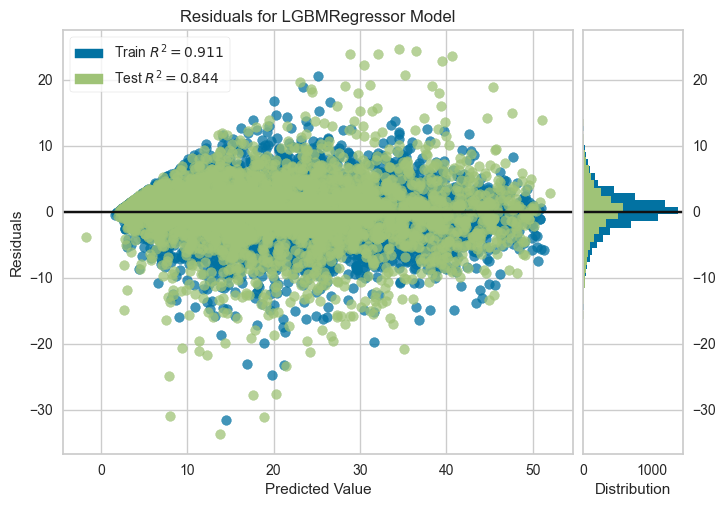

In [30]:
plot_model(best_model)

In [31]:
# Get the last row (most recent data point)
latest_data = df.iloc[-1:].copy()

# Shift lag features forward by 1 day
for lag in range(1, 8):
    latest_data[f'pm_2_5_lag_{lag}'] = df['pm_2_5'].iloc[-lag]

# Make predictions
future_pred = predict_model(best_model, data=latest_data)
future_pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3074,0.0945,0.3074,nan,0.0102,0.0105


,humidity,temperature,year,month,day,day_of_week,week_of_year,pm_2_5_lag_1,pm_2_5_lag_2,pm_2_5_lag_3,pm_2_5_lag_4,pm_2_5_lag_5,pm_2_5_lag_6,pm_2_5_lag_7,pm_2_5,prediction_label
timestamp,,,,,,,,,,,,,,,,
2025-02-09 22:00:00,79.079033,26.41058,2025,2,9,6,6,29.289474,28.583334,27.516666,24.15,24.866667,25.566668,26.288136,29.289474,28.982082
